In [5]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
plt.rcParams['figure.figsize'] = (20,10)


In [ ]:
df1 = pd.read_csv("Indian_Housing.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.shape

(13320, 9)

In [8]:
df1.groupby('area_type')['area_type'].count()
#grouping the count of data sample in each of the type in area_type categories. Grouping the values in area_type

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis = 'columns')
df2.head()
#Assuming that the insignificant columns are not much responsible for the price prediction of our model


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df2.isnull().sum()
#Shows the values in my column which are empty and is null

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()
#dropping null values

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 5)

In [13]:
df3['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [14]:
df3['size'].unique()
#We have values in more than one format which is not good for our processing so we will transform these values into on format so we can use it.

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split (' ')[0]))
#Applied a lambda function in which we spliited the value with the help of a space and taken the first value by the help of [0] arry selecting method 

C:\Users\ESHOP\AppData\Local\Temp\ipykernel_9372\2121295584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split (' ')[0]))


In [16]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [17]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df3[df3.bhk>4].count()

location      843
size          843
total_sqft    843
bath          843
price         843
bhk           843
dtype: int64

In [19]:
df3 = df3.drop('size',axis = 1)

In [20]:
df3.count()

location      13246
total_sqft    13246
bath          13246
price         13246
bhk           13246
dtype: int64

In [21]:
df3['total_sqft'].unique()
#it shows i have values in ranges which i have to get rid of and make a uniform value system to clean and reform these ranges

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

#this function will return false for all the values in which i have ranges instead of pure float values

In [23]:
df3[df3['total_sqft'].apply(is_float)].count() 

#This is giving all the true values and we will have to find the false values to find the ranges 

location      13056
total_sqft    13056
bath          13056
price         13056
bhk           13056
dtype: int64

In [24]:
df3[~df3['total_sqft'].apply(is_float)].count() 
#This ~ negate function helps us to find the false values 

location      190
total_sqft    190
bath          190
price         190
bhk           190
dtype: int64

In [25]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [26]:
def conversion(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

#This function takes the value of x as an strings in which we have seen by the negate function. It will break the value in to two tokens and take convert 
#both of them into float, take the mean and return them. if the lenght of token is 2 it will apply this method. if not 2 then 1 it will convert into simple
#float and retunt and if not any of these then returns none 

In [27]:
df4 = df3.copy()
df4 ['total_sqft'] = df4['total_sqft'].apply(conversion)

In [28]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [29]:
df5 = df4.copy()
df5

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [30]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [31]:
len(df5.location.unique())
#finding uniqe value groups in our location column. We will have some group in which we will have only one home which wont be useful to us

1304

In [32]:
df5.location = df5.location.apply(lambda x: x.strip())
#By using this strip function we will remove any spaces in forward or backward of every group of our location column 

In [33]:
location_groups = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_groups
#we just made the groups of our location in our data frame and sorted our values descending way

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [34]:
len(location_groups[location_groups<=10])
#Now we have find out the locations will values less than or equal to 10

1052

In [35]:
location_less_than_10 = location_groups[location_groups<=10]
location_less_than_10

#Saved all my locations equal or less than 10 to a variable making a list 

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [36]:
len(df5.location.unique())
#Unique locations in my df

1293

In [37]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
#This fucntion says it will store the values will lesser values than 10 for a location in a combined variable names other 
len(df5.location.unique())
#Now unique groups are only 242 will significant number of values in my data set

242

In [38]:
#Now removing outliers as the values which seems abnormal 
#First doing for the total_sqft/bhk, if this ratio is less than 300 it becomes an abnormal value

df5[df5.total_sqft/df5.bhk < 300].count()
#744 rows with our issue which we have to take out of our dataframe

location          744
total_sqft        744
bath              744
price             744
bhk               744
price_per_sqft    744
dtype: int64

In [39]:
df5.shape
#We have 13246 rows

(13246, 6)

In [40]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape
#We have used the negate operator to minus out the rows which shows error in bhk values

(12502, 6)

In [41]:
df6.price_per_sqft.describe()
#267 per sqft is a very low cost and the 176K is also a very high cost per sqft. We will remove these and follow rule of normal distribution to m
#make our model more generic. 65% points should lie around mean value in normal distribution

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
df6.groupby('location').count()

,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,
1st Block Jayanagar,10,10,10,10,10
1st Phase JP Nagar,23,24,24,24,23
2nd Phase Judicial Layout,11,11,11,11,11
2nd Stage Nagarbhavi,9,9,9,9,9
5th Block Hbr Layout,7,7,7,7,7
...,...,...,...,...,...
Yelahanka,205,205,205,205,205
Yelahanka New Town,38,39,39,39,38
Yelenahalli,13,13,13,13,13


In [43]:
def remove_pps_outliners(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

#In this function we have grouped all our location and found the standard deviation and mean values for each location. 
#Now with this value we have collected all values above m-st and dropped the below ones similarly collected vales below m+st and dropped above values
#We given out a df with the values only passing our criteria of normal distribution
#We will make separate data groups by the help of groupby locations function
#we will iterate our for loop in each group data frame 
#we will calculate the m and st of each group 
#reduced dataframe will be made by the values passing the filter 
#all the values in the end will be concatinated in the master data frame in output

In [44]:
df7 = remove_pps_outliners(df6)
df7

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10236,other,1353.0,2.0,110.00,2,8130.081301
10237,other,812.0,1.0,26.00,1,3201.970443
10238,other,1440.0,2.0,63.93,3,4439.583333
10239,other,1075.0,2.0,48.00,2,4465.116279


In [45]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per SQFT")
    plt.legend()

#We have made this fuction to draw a scatter plot of a single location with diff bhk value so we can see the price of our bhk
#The scatter plot shows that the price of some 3BHK are lesser than 2BHK for similar location which is false and impossibel in normal circumstances 


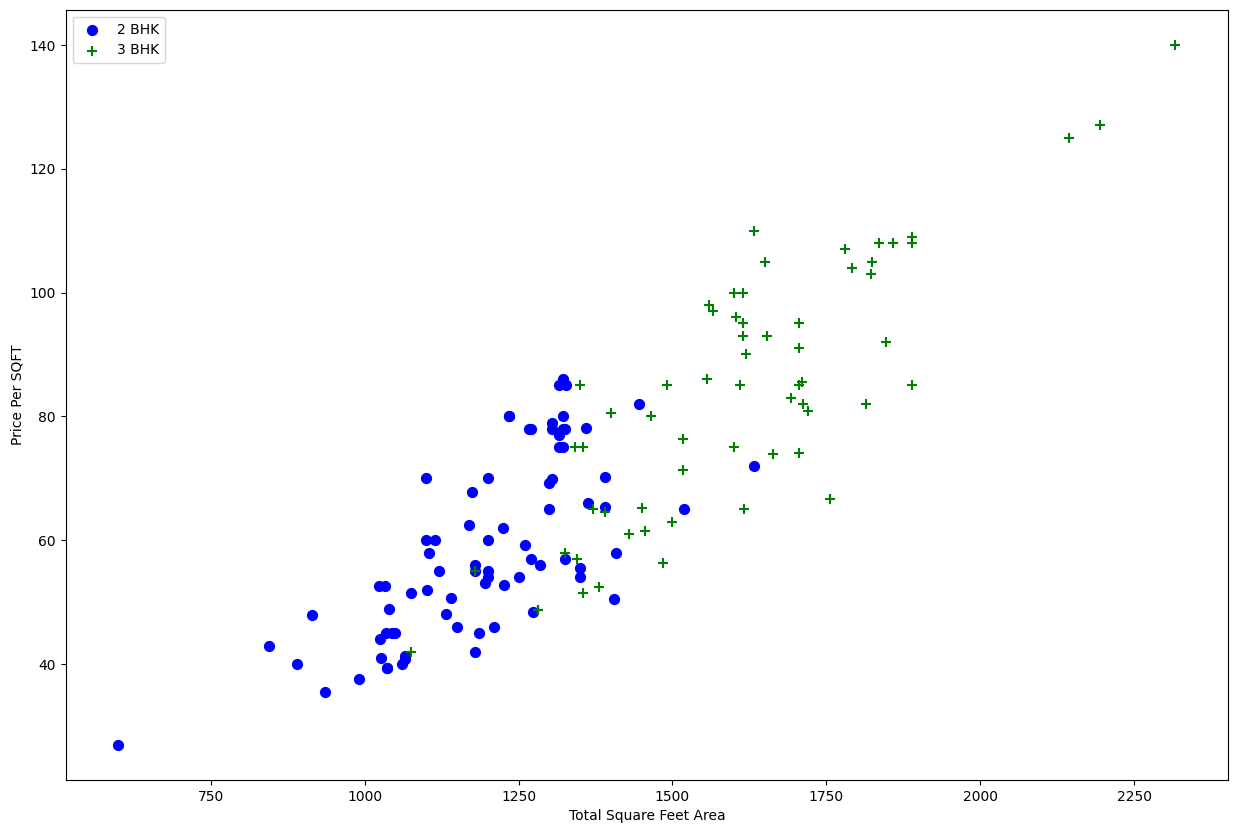

In [46]:
plot_scatter_chart(df7,"Yelahanka")
#The blue 2BHK points over 3BHK doesn't make sense in normal circumstances so we will generalize our model by data cleaning 

In [47]:
def remove_bhk_outliners(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats= {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std'  : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices,axis='index')

In [48]:
df8 = remove_bhk_outliners(df7)
df8.shape

(7329, 6)

Text(0, 0.5, 'Count')

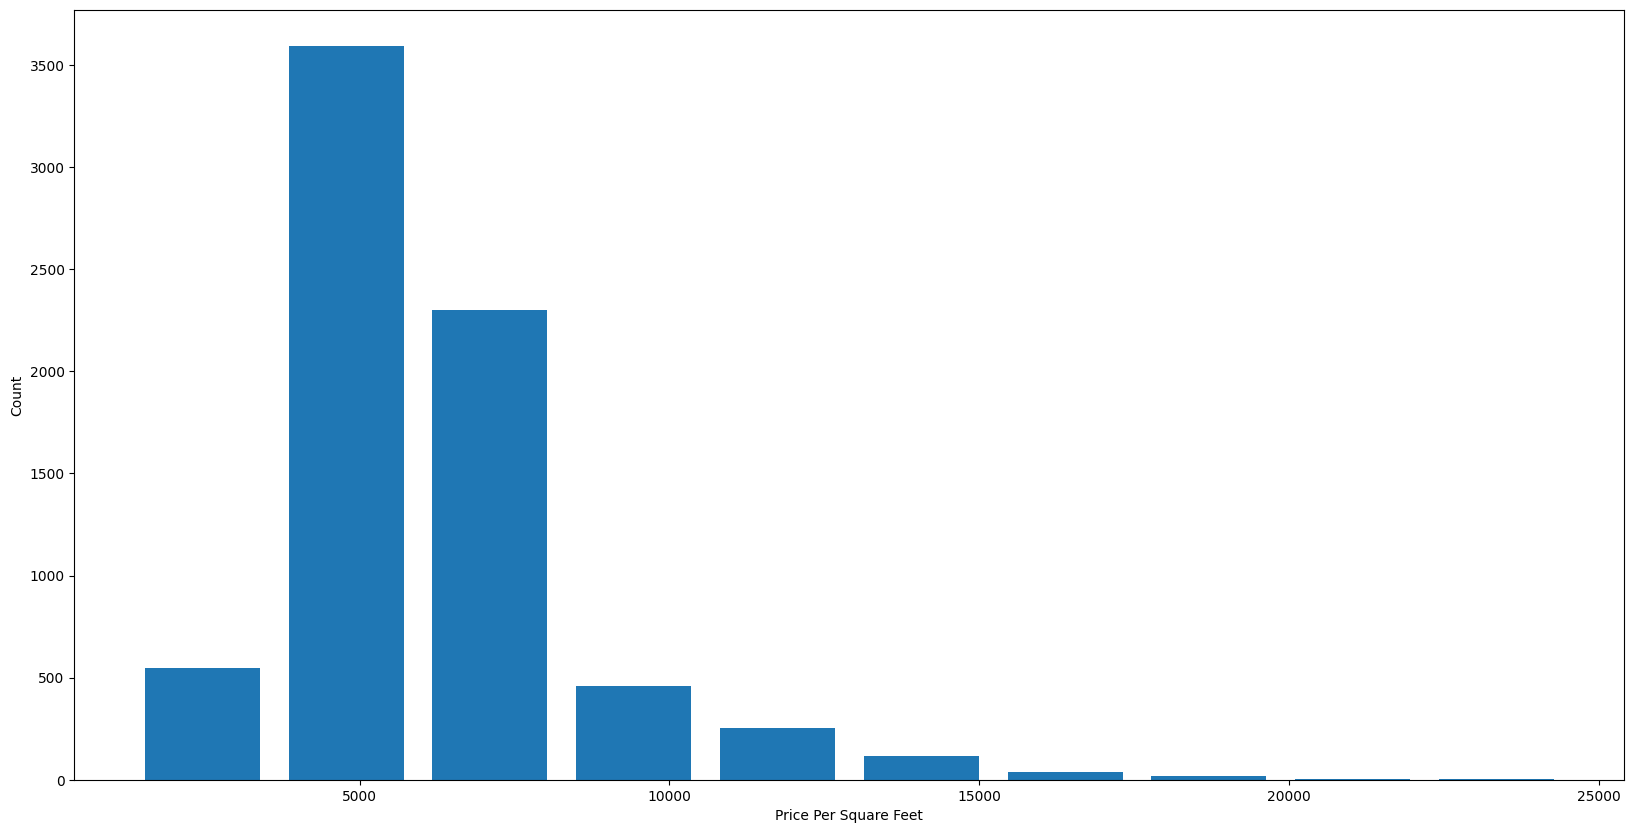

In [49]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [50]:
#This shows that its a normal distribution with a bell curve and most of our values lyin aroun 5000 and before 10000 sqft

df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [51]:
df8[df8.bath>10]

#5 locations with more than 10 bath rooms

#if number of bathroom are greater than the bhk+2 we will remove them as this is not normal is real estate


,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

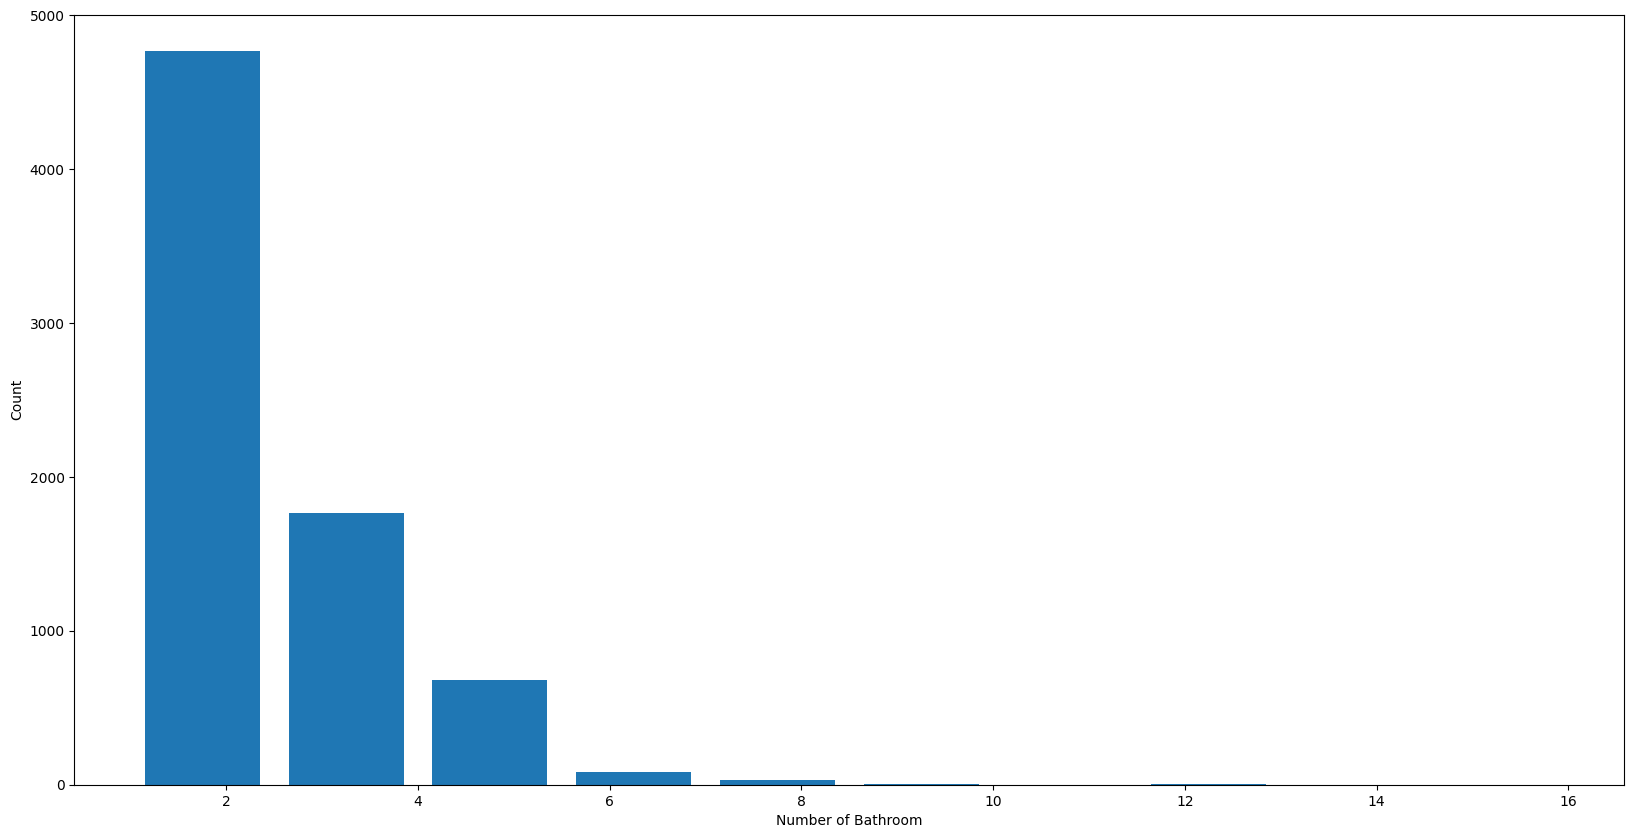

In [52]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathroom")
plt.ylabel("Count")

In [53]:
#Most of the properties have 2-6 max just few with 8 now according to the mentioned criteria above\
df8[df8.bath>df8.bhk+2]
#These 4 are errored values and not making sense to us

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [54]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

#The dataframe is clean now
#price per sqft was used for outlier detection now we will drop this column

(7251, 6)

In [55]:
df9 = df9.drop('price_per_sqft',axis = 1)
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [57]:
df10 = df9

In [76]:
dummies = pd.get_dummies(df10.location).astype(int)

dummies.head(5)

#Hot encoding the string varaible locations to make our model able to read these values
#Using pandas library to make a dummy df and concatinating with original df

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df11 = pd.concat([df10,dummies],axis = 'columns')

df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df11 = df11.drop('other',axis = 'columns')

#to save ourself from dummy trap we will drop one column

In [79]:
df12 = df11.drop('location',axis='columns')
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X = df12.drop('price',axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
Y = df12.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 10)

#splitting the data for test and training
#20% of the data will be taken for testing 
#80% of data will be used for training purpose

In [85]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

#We are evaluating our results on a linear regression model
#This gives us a result of 84.5%
#Normally many diff models are applied with tweaked parameters to check for the different scores and check which model best fits

0.8452277697874349

In [90]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), X, Y, cv = cv)


#We have splitted the data at random different points this time and it gives the avearge perfromance score at each point of our linear regression

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286,
       0.77463657, 0.84724578, 0.84813854, 0.84493306, 0.85893313])

In [101]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {

        'linear_regression':{
            'model' : LinearRegression(),
            'params' : {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']}
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params':{
                    'criterion': ['squared_error', 'friedman_mse'],  # Correct values
                     'splitter': ['best', 'random']}}}
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X,Y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)



#We have created a dictionary with the configurations and model to test for our model
#Linear Regression, Lasso and Decision tree Regression are used in this 
#An array for scores is created which will be returned in a df
#We have used the k4 split first and then with  a for loop we have run the grid search cv to find the best model scores  
#in each iteraion we provide the config (model name) and config (paramters) to the method
#then we run it with gs.fit
#the scores are then appenede in the earliear defined array


,model,best_score,best_params
0,linear_regression,0.819001,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.713196,"{'criterion': 'squared_error', 'splitter': 'be..."


In [ ]:
#Winner is Linear Regression wich are provided with the best parameters

In [ ]:
#using lr_clf as it is already 84% ready

In [155]:
def predict_price(location,total_sqft,bath,bhk):
    loc_index = int(np.where(X.columns == location)[0][0])
    #This is used to locate the column from text

    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk

    if loc_index>=0:
        x[loc_index]=1

    x_df = pd.DataFrame([x], columns = X.columns)
    return lr_clf.predict(x_df)[0]

In [160]:
float(predict_price('1st Phase JP Nagar',1000,3,3))

86.80519395220996

In [161]:
float(predict_price('1st Phase JP Nagar',2000,3,4))

164.44769011239947